In [3]:
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
ZipFile("/content/drive/MyDrive/Project_CE434/vehicle/test.zip","r").extractall()
ZipFile("/content/drive/MyDrive/Project_CE434/vehicle/train.zip", "r").extractall()

In [ ]:
train_dir = "./train"
test_dir = "./test"

train_names = os.listdir(train_dir)
categories = []
for i in train_names: 
    category = i.split(".")[0]
    if category == "car":
        categories.append("0")
    else:
        categories.append("1")
train = pd.DataFrame({
    "filename" : train_names,
    "category" : categories
})

train.head(10)

,filename,category
0,moto.186.jpg,1
1,moto.5.jpg,1
2,moto.66.jpg,1
3,moto.307.jpg,1
4,car.312.jpg,0
5,moto.267.jpg,1
6,car.127.jpg,0
7,car.368.jpg,0
8,moto.141.jpg,1
9,moto.363.jpg,1


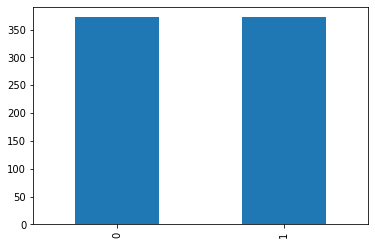

In [ ]:
train['category'].value_counts().plot.bar()

In [4]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

model.add(Conv2D(128, (3,3), activation="relu", padding="same", name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation="relu", padding="same", name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
#chia tap train va validation
train_df, validate_df = train_test_split(train, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)


In [ ]:
#tao tap train
train_datagen = ImageDataGenerator(rotation_range=40,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True,
    validate_filenames=False
)

Found 595 non-validated image filenames belonging to 2 classes.


In [ ]:
#tao tap validation

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True,
    validate_filenames=False
)

Found 149 non-validated image filenames belonging to 2 classes.


In [ ]:
#fit model

batch_size = 64
epochs = 5

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_df)/batch_size,
    epochs= epochs,
    validation_data=validation_generator,
    validation_steps=len(validate_df)/batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
9/9 [==============================] - 1069s 115s/step - loss: 0.7149 - accuracy: 0.4789 - val_loss: 0.6930 - val_accuracy: 0.5168
Epoch 2/5
9/9 [==============================] - 1065s 115s/step - loss: 0.6935 - accuracy: 0.4769 - val_loss: 0.6937 - val_accuracy: 0.4832
Epoch 3/5
9/9 [==============================] - 1071s 116s/step - loss: 0.6940 - accuracy: 0.4757 - val_loss: 0.6934 - val_accuracy: 0.4832
Epoch 4/5
9/9 [==============================] - 1069s 116s/step - loss: 0.6930 - accuracy: 0.5154 - val_loss: 0.6937 - val_accuracy: 0.4832
Epoch 5/5
9/9 [==============================] - 1068s 116s/step - loss: 0.6927 - accuracy: 0.5237 - val_loss: 0.6936 - val_accuracy: 0.4832


In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, len(validate_df)/batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test: accuracy = 0.483221  ;  loss = 0.693595 
